# Imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load data

In [3]:
# load gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED.csv 
df = pd.read_csv('data/gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED.csv')

In [6]:
df_prod = df[df['type'] == 'production']
df_cons = df[df['type'] == 'consumption']

# Summary statistics

In [20]:
df_prod_desc = df_prod["num_kwh_normalized"].describe()
df_cons_desc = df_cons["num_kwh_normalized"].describe()

# Concat series into dataframe
df_prod_cons_desc = pd.concat([df_prod_desc, df_cons_desc], axis=1)

#Change column names
df_prod_cons_desc.columns = ['Production', 'Consumption']

print(df_prod_cons_desc.to_latex())

\begin{tabular}{lrr}
\toprule
{} &     Production &    Consumption \\
\midrule
count &  891400.000000 &  962585.000000 \\
mean  &       0.009133 &       0.140550 \\
std   &       0.030896 &       0.134185 \\
min   &       0.000000 &       0.000000 \\
25\%   &       0.000000 &       0.047619 \\
50\%   &       0.000000 &       0.107143 \\
75\%   &       0.000000 &       0.200000 \\
max   &       0.611111 &       1.562500 \\
\bottomrule
\end{tabular}



C:\Users\andre\AppData\Local\Temp\ipykernel_11612\1424640167.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_prod_cons_desc.to_latex())


# Explore single meter
The one with most observations

<class 'pandas.core.series.Series'>


<AxesSubplot:>

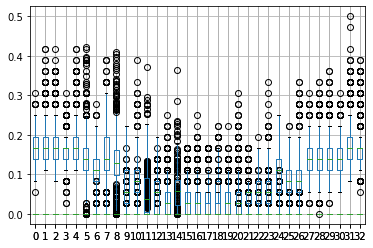

In [110]:
# Meter with most observations
mm_id = "28ba7f57-6e83-4341-8078-232c1639e4e3"

df_mm = df[df['meter_id'] == mm_id]

df_mm_prod = df_mm[df_mm['type'] == 'production']
df_mm_cons = df_mm[df_mm['type'] == 'consumption']


df_mm_prod.index = pd.to_datetime(df_mm_prod['timeslot'], utc=True)
df_mm_cons.index = pd.to_datetime(df_mm_cons['timeslot'], utc=True)


print(type(df_mm_prod["num_kwh_normalized"]))
# Make monthly boxplot for df_mm_prod


# groups = df_mm_prod["num_kwh_normalized"].groupby(pd.Grouper(freq='M'))
groups = df_mm_prod["num_kwh_normalized"].groupby(by=[df_mm_prod["num_kwh_normalized"].index.month, df_mm_prod["num_kwh_normalized"].index.year])

# Make boxplot of groupby object
df_mm_prod_monthly = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
df_mm_prod_monthly

df_mm_prod_monthly = pd.DataFrame(df_mm_prod_monthly)
df_mm_prod_monthly.columns = range(len(groups))
df_mm_prod_monthly.boxplot()
# df_mm_prod_monthly.boxplot()



# groups = df_mm_prod["num_kwh_normalized"].groupby(pd.Grouper(freq='M'))
groups = df_mm_cons["num_kwh_normalized"].groupby(by=[df_mm_cons["num_kwh_normalized"].index.month, df_mm_cons["num_kwh_normalized"].index.year])

# Make boxplot of groupby object
df_mm_cons_monthly = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
df_mm_cons_monthly

df_mm_cons_monthly = pd.DataFrame(df_mm_cons_monthly)
df_mm_cons_monthly.columns = range(len(groups))
df_mm_cons_monthly.boxplot()
